# $\color{purple}{1) \; \text{Radioactivity problem }}$ 

---

We have an emmiter of decaying particles and are measuring the probability in the range $x=(1,20)$ from the emmiter.

$$P_{\lambda}(x)= \begin{cases} \frac{e^{-\frac{x}{\lambda}}}{Z(\lambda)}; \qquad &if \quad x\in(1,20),\\0; \qquad &otherwise. \end{cases}$$


## $\color{purple}{\text{Question 1}}$ 
--- 



### $\color{purple}{\text{1a)}}$ ###

--- 
Compute $Z(\lambda)$ such that the probability distribution is normalized 




\begin{align}
    Z(\lambda) &=  \int_1^{20} dx \, e^{\frac{-x}{\lambda}} \\ 
    &= \lambda \int_{z_1}^{z_2} dz \,e^{-z}   \,\,\,\, \textit{with} \,\, \, z = \frac{x}{\lambda} \\
    &= \lambda [e^{\frac{-1}{\lambda}} - e^{\frac{-20}{\lambda}}]
\end{align}





### $\color{purple}{\text{1b)}}$ 
--- 
Show that ${\mathbb E}[X]=\lambda^2 \partial_{\lambda} \log Z(\lambda)$


\begin{align}
    \partial_{\lambda} \log(Z(\lambda)) &= \frac{1}{Z(\lambda)} \partial_{\lambda}Z(\lambda)  \\
    &= \frac{1}{Z(\lambda)}\partial_{\lambda}\int_1^{20}dx \, e^{\frac{-x}{\lambda}} \\
    &= \frac{1}{Z(\lambda)}\int_{1}^{20}dx \,\frac{x}{\lambda^2} e^{\frac{-x}{\lambda}}\\
    &= \frac{1}{\lambda^2}\mathbb{E}[x]
\end{align}

### $\color{purple}{\text{1c)}}$ 
--- 


Show ${\rm var}[X]= \lambda^2  \partial_{\lambda} {\mathbb E}[X]$

\begin{align}
    \partial_{\lambda} \mathbb{E}[x] &= \partial_{\lambda}{\frac{1}{Z(\lambda)}\int_1^{20}dx /, xe^{\frac{-x}{\lambda}}} \\
    &= \frac{Z(\lambda)\frac{1}{\lambda}^2 \int_1^{20}x^2e^{\frac{-x}{\lambda}}  \,\, - \partial_{\lambda}Z(\lambda)\int_1^{20}dx\, xe^{\frac{-x}{\lambda}}
    }{Z(\lambda)^2} \\
    &= \frac{\mathbb{E}[x]}{\lambda^2} -\frac{1}{\lambda^2}\mathbb{E}[x]\partial_{\lambda}\log(Z(\lambda)) \\
    &= \frac{V[x]}{\lambda^2}
\end{align}

### $\color{purple}{\text{1d)}}$ 
--- 


 Compute and plot the mean as a function of $\lambda$

\begin{align}
    \mu(\lambda) &= \mathbb{E}[x;\lambda]\\
    &= \lambda^2 \partial_{\lambda} \log Z(\lambda) \\
    &= \frac{-20 -\lambda +e^{\frac{19}{\lambda}}(1+\lambda)}{e^{\frac{19}{\lambda}}-1}
\end{align}
I will use the simpler software for plotting which is Wolfram|Alpha

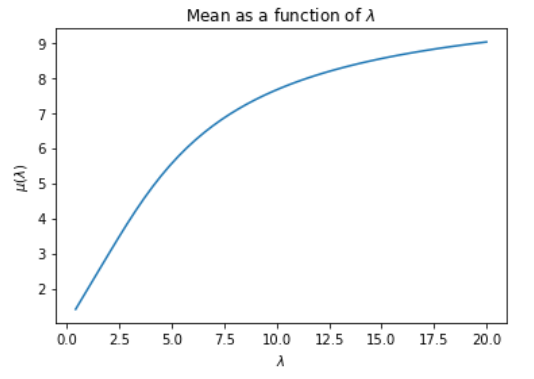

### $\color{purple}{\text{1e)}}$ 
--- 


 Compute and plot the variance as a function of $\lambda$

 \begin{align}
    \Delta(\lambda) &= V[x;\lambda]\\
    &= \lambda^2 \partial_{\lambda} \mathbb{E}[x;\lambda] \\
    &= \frac{-361e^{\frac{19}{\lambda}}+(1-e^{\frac{19}{\lambda}})^2\lambda^2}{(-1+e^{\frac{19}{\lambda}})^2}
\end{align}

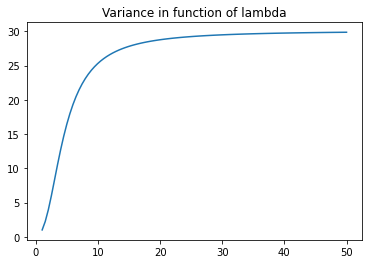

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def variance(lam):
    return (lam**2*(-1+np.exp(19/lam))**2-361*np.exp(19/lam)) / (-1+np.exp(19/lam))**2

lams = np.linspace(1, 50, 100)

plt.plot(lams, variance(lams))
plt.title("Variance in function of lambda")
plt.show()

## $\color{purple}{\text{Question 2}}$ 
--- 



 What is the probability $P_{\lambda}(\left\{x_i\right\}_{i=1}^n)$ to observe a set of $n$ events at position $\left\{x_i\right\}_{i=1}^n$? 


What is the log-likelihood function ${\cal L}(\lambda,\left\{x_i\right\}_{i=1}^n)) = \log(
P_{\lambda}(\left\{x_i\right\}_{i=1}^n) /n$ ?

$P_{\lambda}(\left\{x_i\right\}_{i=1}^n)= \prod_{i=1}^n P_{\lambda}(x_i) =   \prod_{i=1}^n e^{\frac{-x_i}{\lambda}}$



${\cal L}(\lambda,\left\{x_i\right\}_{i=1})=\frac{1}{n}\sum_{i=1}^n\frac{-x_i}{\lambda} - \log (Z(\lambda))$

## $\color{purple}{\text{Question 3}}$ 
--- 



### $\color{purple}{\text{3a)}}$ 
--- 
Write a program that simulates $n$ such observations sampled from the probability distribution for a fixed $\lambda$.


We can simply use the *np.random* function and reject all the values which does not fall in the interval $[1,20]$.

In [7]:
def dist(lam,N):
  count = 0 ; data = []
  while True:
    aux = np.random.exponential(lam)
    if aux<20 and aux>1:
      count+=1
      data.append(aux)
    if count==N:
      break
  return data

We will exploit a more clever method which is called the $\textbf{"Inverse transform sampling"}$. 

Let's define the problem: we would like to generate the datapoint $x \sim P_{\lambda}$ by using an uniform variable $u \sim U([0,1))$. By assuming some regularity on the CDF, i.e. invertibility, we can sample $x \sim P_{\lambda}$ by simply computing: $ x = F^{-1}(u) $ where $ u \sim U([0,1)) $

Specializing in our case the workflow reads: 
* Extract $u \in[0,1)$ from uniform distribution $\mathcal{U}([0,1))$ 
* $x=20-\lambda \log\left[\exp(19/\lambda)+u(1-\exp(19/\lambda))\right]$



In [8]:
# Sampler from the distribution
def dist(lam,N,seed):
  np.random.seed(seed)
  return 20.-lam*np.log(np.exp(19./lam)+np.random.random(N)*(1.-np.exp(19./lam)))

### $\color{purple}{\text{3b)}}$ 
--- 
Choose the true value to be $\lambda^*=10$.

 Generate $n=10$ observations. 
 
 Plot the likelihood as a function of $\lambda$. 
 
 Repeat for $n=20,100$ and discuss what you see.


In [9]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
# We will optimize the loglikelyhood with scipy.optimize
import scipy.optimize as so

In [10]:
def pdist(lam,xi):
    return np.exp(-xi/lam)/(lam*(np.exp(19./lam)-1.)*np.exp(-20./lam))

# Log-likelyhood
def loglh(lam,x):
    return sum(np.log(pdist(lam,x)))
    

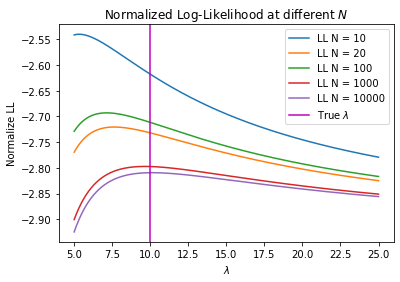

In [11]:
lam = 10
Ns = [10,20,100,1000,10000] 
tab_lam = np.linspace(5,25,1000)
funcs = [] ; i=-1 ; x = []
for N in Ns:
  i += 1 ; x.append(dist(lam,N,seed=1926))
  f = lambda y: loglh(y,x[i])
  # Normalized log-likelyhood
  fs = [f(lam)/N for lam in tab_lam] 
  funcs.append(fs)
  plt.plot(tab_lam,fs, label = f"LL N = {N}")
plt.axvline(lam,label="True $\lambda$",c="m")
plt.title('Normalized Log-Likelihood at different $N$')
plt.xlabel('$\lambda$') ; plt.ylabel("Normalize LL")
plt.legend()
plt.show()


The normalized log-likelyhood is getting more and more peaked around true $\lambda$.


## $\color{purple}{\text{Question 4}}$ 
--- 



Create some data set with $n=10,100,1000$ for different values of $\lambda^*$ between $0$ and $50$ and see how the ML estimator performs.

In [12]:
tab_lam=np.linspace(5,50,20)
MSEs = []
N_sam=100
Ns = [10,100,1000]
# Loop on possible values of N
for N in Ns:
  MSE=np.zeros(len(tab_lam))
  # Loop on values of half-life
  for i in range(len(tab_lam)):
    # Loop on the number of trials for averaging the MSE 
    for k in range(N_sam):
      seed = np.random.randint(0,10e5)
      x=dist(tab_lam[i],N,seed)
      lamML=so.fmin(lambda y:-loglh(y,x),np.random.uniform(0,20),disp=False)
      # Reject unphysical minima by brute force
      if lamML < 50:
        MSE[i]+=(lamML-tab_lam[i])**2/N_sam
  MSEs.append(MSE)


/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_69725/4215556779.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-xi/lam)/(lam*(np.exp(19./lam)-1.)*np.exp(-20./lam))
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_69725/4215556779.py:2: RuntimeWarning: invalid value encountered in multiply
  return np.exp(-xi/lam)/(lam*(np.exp(19./lam)-1.)*np.exp(-20./lam))
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_69725/4215556779.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-xi/lam)/(lam*(np.exp(19./lam)-1.)*np.exp(-20./lam))
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_69725/4215556779.py:2: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(-xi/lam)/(lam*(np.exp(19./lam)-1.)*np.exp(-20./lam))


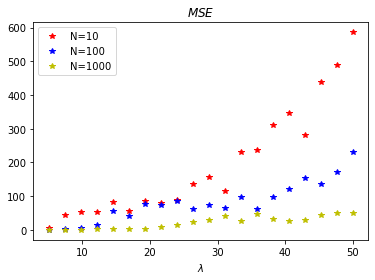

In [13]:
plt.title('$MSE$')
plt.xlabel('$\lambda$')
plt.plot(tab_lam,MSEs[0],"*",color='r',label="N=10")
plt.plot(tab_lam,MSEs[1],"*",color='b',label="N=100")
plt.plot(tab_lam,MSEs[2],"*",color='y',label="N=1000")
plt.legend() ; plt.show()


## $\color{purple}{\text{Question 5 bonus}}$ 
--- 



Show that the Fisher score information in this problem is given by
\begin{equation}
I(\lambda) = {\mathbb E} \left[ 
\left(\frac  {\partial}{\partial \lambda} \log 
P_{\lambda}(X)\right)^2 \right] = 
\frac 1{\lambda^4} {\mathbb E} \left[(X - \mathbb{E}[X] )^2\right]
= \frac{{\rm var}[X]}{\lambda^4}    
\end{equation}


Let us develop what is inside the square:

\begin{align}
    \partial_{\lambda}\log(P(\lambda)) &= \partial_{\lambda}(\frac{1}{Z(\lambda)}e^{\frac{-x}{\lambda}}) \\
    &= \partial_{\lambda}(\frac{-x}{\lambda}-\log Z(\lambda))\\
    &= \frac{x-\mathbb{E}[x]}{\lambda^2}
\end{align}


We trivially recover the result once substituting inside the formula for $I(\lambda)$

## $\color{purple}{\text{Question 5-6-7}}$ 
--- 

6) Implement the MAP estimator using Jeffreys prior.

7) Compute the MSE for the two estimator for different n and $\lambda^*$

8) Compare the MSE curves with the Cramer-Rao bound

Let's analyze the comparison of MSE, Cramers-Rao and MAP estimator with Jeffreys prior at different n.


In [14]:
from tqdm import tqdm
from scipy.signal import savgol_filter

def fisher(lam):
   return variance(lam)/lam**4

def bootstrap_CI(y,B=1000):
  '''
  y : array of original observations // B : #(Bootsrap dataset)
  '''
  # Choose length of each bootstrap dataset equal to original one (Not mandatory)
  n = len(y)
  sample_mean = []
  for _ in range(B):
      sample_n = np.random.choice(y, size=n)
      sample_mean.append(sample_n.mean())
  boot_mean = np.mean(sample_mean) 
  p025 = np.quantile(sample_mean,0.025)
  p975 = np.quantile(sample_mean,0.975)
  return  boot_mean , p025 , p975

def analisys(N, N_sam=100):
  tab_lam=np.linspace(4,60,50)
  MSE=np.zeros(len(tab_lam))  ; MSE_J=np.zeros(len(tab_lam))
  errMSE = np.zeros((len(tab_lam),2)) ; errMSE_J = np.zeros((len(tab_lam),2))
  for i in tqdm(range(len(tab_lam))):
    store = [] ; storeJ = []
    for k in tqdm(range(N_sam),leave=False):
      seed = np.random.randint(0,10e5)
      x=dist(tab_lam[i],N,seed)
      # lamML=so.fmin(lambda y:-loglh(y,x),np.random.uniform(0,20),disp=False)[0]
      # lamJ=so.fmin(lambda y:-loglh(y,x) - np.log(np.sqrt(fisher(y))),np.random.uniform(0,20),disp=False)[0]
      lamML=so.minimize(lambda y:-loglh(y,x),np.mean(x),method='Nelder-Mead',bounds=[[1e-5,5e1]]).x[0]
      lamJ=so.minimize(lambda y:-loglh(y,x) - np.log(np.sqrt(fisher(y))),np.mean(x),method='Nelder-Mead',bounds=[[1e-5,5e1]]).x[0]
      store.append(lamML) ; storeJ.append(lamJ)
    MSE[i] , errMSE[i,0] , errMSE[i,1] = bootstrap_CI((np.array(store)-tab_lam[i])**2)
    MSE_J[i] , errMSE_J[i,0] , errMSE_J[i,1] = bootstrap_CI((np.array(storeJ)-tab_lam[i])**2)

  plt.title(f"ML estimator vs MAP estimator with Jeffreys prior N={N}")
  plt.ylabel('$MSE$')
  plt.xlabel('$\lambda$')
  plt.errorbar(tab_lam,MSE,fmt="*",color='r',label='MAX-LL',yerr=[MSE - errMSE[:,0], errMSE[:,1]-MSE])
  plt.errorbar(tab_lam,MSE_J,fmt="*",color='g',label='MAP - Jeffreys',yerr=[MSE_J - errMSE_J[:,0], errMSE_J[:,1]-MSE_J])
  tab_l=np.linspace(0.01,45,100)
  onI=[1/N/fisher(lam) for lam in tab_l]
  plt.ylim(0,max(MSE_J)*1.1)
  plt.plot(tab_l,onI,label="Cramers-Rao bound")

  plt.legend() ; plt.show()

### $\color{purple}{\text{N=10}}$ 
--- 

100%|██████████| 50/50 [00:16<00:00,  2.98it/s]
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_69725/1967785796.py:5: RuntimeWarning: overflow encountered in exp
  return (lam**2*(-1+np.exp(19/lam))**2-361*np.exp(19/lam)) / (-1+np.exp(19/lam))**2
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_69725/1967785796.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return (lam**2*(-1+np.exp(19/lam))**2-361*np.exp(19/lam)) / (-1+np.exp(19/lam))**2


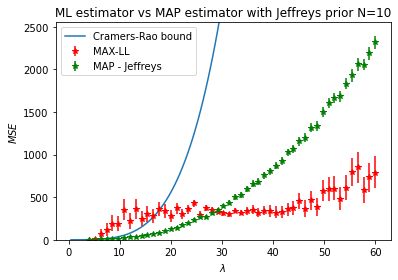

In [15]:
analisys(10)

### $\color{purple}{\text{N=100}}$ 
--- 

100%|██████████| 50/50 [00:22<00:00,  2.21it/s]
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_69725/1967785796.py:5: RuntimeWarning: overflow encountered in exp
  return (lam**2*(-1+np.exp(19/lam))**2-361*np.exp(19/lam)) / (-1+np.exp(19/lam))**2
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_69725/1967785796.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return (lam**2*(-1+np.exp(19/lam))**2-361*np.exp(19/lam)) / (-1+np.exp(19/lam))**2


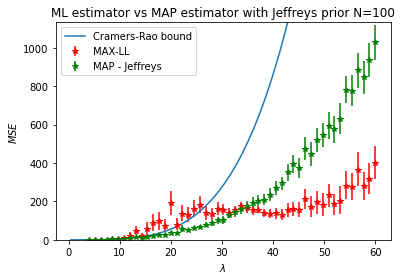

In [16]:
analisys(100)

### $\color{purple}{\text{N=1000}}$ 
--- 

100%|██████████| 50/50 [00:49<00:00,  1.00it/s]
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_69725/1967785796.py:5: RuntimeWarning: overflow encountered in exp
  return (lam**2*(-1+np.exp(19/lam))**2-361*np.exp(19/lam)) / (-1+np.exp(19/lam))**2
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_69725/1967785796.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return (lam**2*(-1+np.exp(19/lam))**2-361*np.exp(19/lam)) / (-1+np.exp(19/lam))**2


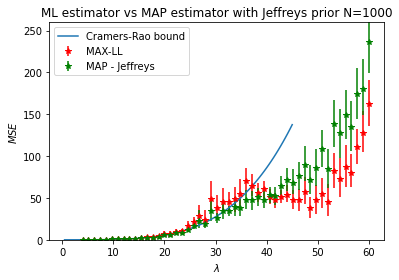

In [17]:
analisys(1000)


# $\color{purple}{2) \; \text{Probability bounds and a pooling problem }}$ 

---

We are going to follow the steps we took in lecture $1$ and prove an interesting inequality:  Let $Z_1,\ldots,Z_m$ be independent random variables such that $Z_i =1$ with probability $p$, and $0$ with probability $1-p$. Then, for any $\epsilon \ge 0$ we have
$$
\mathbb{P}\left(\frac 1m \sum_i Z_i  \ge p + \epsilon \right) \le e^{-2m\epsilon^2}
$$

### <span style="color:purple">Question 1</span>: 
#### Using Markov inequality and the proof strategy discussed in lecture 1, show that:
$$
\mathcal{P} \equiv \mathbb{P}\left(\frac 1m \sum_i Z_i  \ge p + \epsilon \right) \le \left(\frac{p e^{\lambda} + (1-p)}{e^{\lambda(p+\epsilon)}}\right)^m
$$

We can rewrite

$$
\mathcal{P} = \mathbb{P}\bigg( e^{\lambda \sum_i^mz_i} \geq e^{\lambda m (p+\epsilon)} \bigg)
$$

And using Markov

$$
\mathcal{P} \leq \frac{\mathbb{E}_{z_i}\big[e^{\lambda\sum_i^m z_i}\big]}{e^{\lambda(p+\epsilon)m}} = \frac{\prod_i^m \big[ pe^{\lambda} + (1-p) \big]}{e^{\lambda(p+\epsilon)m}} = \Bigg[ \frac{ pe^{\lambda} + (1-p)}{e^{\lambda(p+\epsilon)}} \Bigg]^m
$$

### <span style="color:purple">Question 2</span>: 
#### Using the value of $\lambda$ that minimizes the right-hand side of the former equation, show that
$$
\mathbb{P}\left(\frac 1m \sum_i Z_i  \ge p + \epsilon \right) \le e^{-m f(p,\epsilon)}
$$
### with 
$$
f(p,\epsilon) = -\log \left(\left({\frac {p}{p+\epsilon }}\right)^{p+\epsilon }{\left({\frac {1-p}{1-p-\epsilon }}\right)}^{1-p-\epsilon }\right)
$$

We derive the expression inside the parentheses found in question 1 to find the extrema $\overline{\lambda}$:

$$
\frac{\partial }{\partial \lambda} \log \left(\frac{p e^{\lambda} + (1-p)}{e^{\lambda(p+\epsilon)}}\right) = \frac{\partial }{\partial \lambda} \left( \log \left(pe^{\lambda} + (1-p)\right) \right) - (p+\epsilon) =  \frac{pe^{\lambda}}{pe^{\lambda} + (1-p)} - p - \epsilon = 0
$$

Inverting the expression

$$
e^{\overline{\lambda}} = \frac{(1-p)(p+\epsilon)}{p(1-p-\epsilon)} \quad \Longrightarrow \quad \overline{\lambda} = \log\bigg( \frac{(1-p)(p+\epsilon)}{p(1-p-\epsilon)}\bigg)
$$

Computing the second derivative and evaluating it at $\overline{\lambda}$ one can check (*see cell below*) that it is indeed a mimimum for every $\epsilon>0$ and every $p \in[0,1-\epsilon]$. Therefore we can write

$$
\mathcal{P} \leq \Bigg[ \frac{ \frac{(1-p)(p+\epsilon)}{1-p-\epsilon} +1 - p}{\Big( \frac{(1-p)(p+\epsilon))}{p(1-p-\epsilon)} \Big)^{p+\epsilon}}\Bigg]^m = \exp\bigg\{-m \log \Bigg[ \frac{\Big( \frac{(1-p)(p+\epsilon))}{p(1-p-\epsilon)} \Big)^{p+\epsilon}}{ \frac{1-p}{1-p-\epsilon}}\Bigg] \bigg\}
$$

Using the properties of the logarithm one can rewrite this expression as 

$$
\mathcal{P} \le e^{-m f(p,\epsilon)}
$$

where

$$
f(p,\epsilon) = (p+\epsilon)\log\bigg( \frac{p+\epsilon}{p} \bigg) + (1-p-\epsilon)\log\bigg( \frac{1-p-\epsilon}{1-p} \bigg)
$$

Which is equivalent to the expression we wanted to prove.

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_69725/2790018910.py:11: RuntimeWarning: invalid value encountered in double_scalars
  Z = np.array([ np.array([ (((1 - p)*(p + eps))/(p*(-p - eps + 1)))**(-p - eps) *(((1 - p)*(p + eps - 1)**2 *(p + eps))/(-p - eps + 1) - (p - 1)*(-p - eps)**2) for eps in table_eps ]) for p in table_p ])
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_69725/2790018910.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  Z = np.array([ np.array([ (((1 - p)*(p + eps))/(p*(-p - eps + 1)))**(-p - eps) *(((1 - p)*(p + eps - 1)**2 *(p + eps))/(-p - eps + 1) - (p - 1)*(-p - eps)**2) for eps in table_eps ]) for p in table_p ])


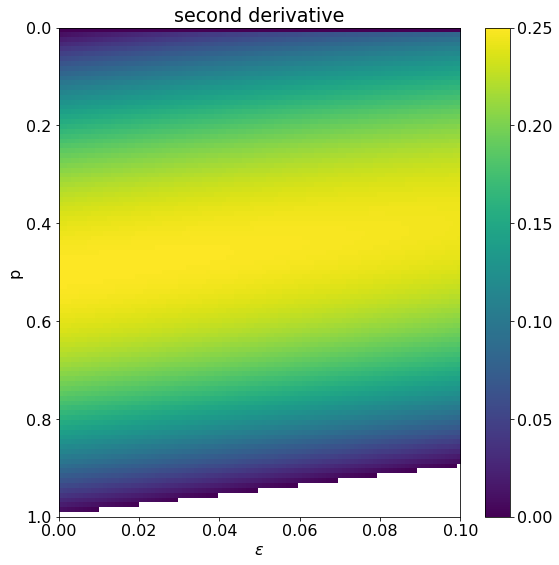

In [27]:
#Plot to see that the sign of the second derivative is always positive

plt.rcParams["figure.figsize"] = (9, 9)
plt.rcParams["font.size"] = 16

table_p=np.linspace(0,1.,101,endpoint=True)
table_eps=np.linspace(0,0.1,101,endpoint=True)

x, y = np.meshgrid(table_eps, table_p)

Z = np.array([ np.array([ (((1 - p)*(p + eps))/(p*(-p - eps + 1)))**(-p - eps) *(((1 - p)*(p + eps - 1)**2 *(p + eps))/(-p - eps + 1) - (p - 1)*(-p - eps)**2) for eps in table_eps ]) for p in table_p ])

im = plt.imshow(Z , extent=[0,0.1,1,0], aspect='auto')  
#cset = plt.contourf(x,y,Z, linewidths=2, cmap=plt.cm.Set2)
#plt.clabel(cset, inline=True, fmt='%1.3f', fontsize=10)
plt.colorbar(im)  
plt.xlabel(r'$\epsilon$')
plt.ylabel('p')
#plt.xlim(0,0.1)
plt.title('second derivative')
#plt.ylim(0,1)

plt.show()

### <span style="color:purple">Question 3</span>: 
#### Show that 
$$
f(p,\epsilon=0)=0,\, \frac {\partial f(p,\epsilon)}{\partial \epsilon} \bigg|_{\epsilon=0} = 0,\text{ and that } \frac {\partial^2 f(p,\epsilon)}{\partial \epsilon^2}  \ge 4~\text{ for any }\epsilon.
$$

The first one is trivial, we have simply $f(p,0) = -\log{1} = 0\,.$

For the second one we can write 
$$
\frac{\partial f(p,\epsilon)}{\partial \epsilon} = \log\Big(\frac{p+\epsilon}{p}\Big) + \frac{p}{p} - \log\bigg( \frac{1-p-\epsilon}{1-p} \bigg) - \frac{1-p}{1-p}
$$
And therefore

$$
\frac{\partial f(p,\epsilon)}{\partial \epsilon}\bigg|_{\epsilon=0} = 0+1-0-1 = 0
$$

For the third one we can comopute the second derivative:

$$
\frac{\partial^2 f(p,\epsilon)}{\partial \epsilon^2} = \frac{1}{p+\epsilon} + \frac{1}{1-p-\epsilon} = \frac{1}{(p+\epsilon)(1-(p+\epsilon))}
$$

Calling $x = p + \epsilon$, we see that the second derivative has a minimum at $x= 1/2$, where we have

$$
\frac{\partial^2 f(p,\epsilon)}{\partial \epsilon^2}\Bigg|_{p+\epsilon=1/2} = 4
$$

And from this result the answer to the question follows in a straightforward way.

### <span style="color:purple">Question 4</span>: 
#### Use Taylor's theorem (that states that $f(p,\epsilon)=f(p,0)+\epsilon f'(p,0) + \epsilon^2 f''(p,\tilde \epsilon)/2$ for some unknown $\tilde \epsilon$, and where the prime stands for derivative with respect to $\epsilon$) to show that $f(p,\epsilon)\ge2\epsilon^2$, and prove the inequality

Using what we just found, we can simply write

$$
f(p,\epsilon) \geq f(p,0)+\epsilon f'(p,0) + \epsilon^2 \frac{4}{2} = 0 + 0 + 2\epsilon^2
$$

Then, using the result of Question 2 and the fact that the exponential is a monothonic function, this inequality brings us directly to the final result.

### <span style="color:purple">Bonus 3</span>: 

We can rewrite

$$
\mathcal{P_2} = \mathbb{P}\bigg( - \sum_i^mz_i \geq m (\epsilon-p) \bigg) =\mathbb{P}\bigg( e^{-\lambda \sum_i^mz_i} \geq e^{\lambda m (\epsilon-p)} \bigg)
$$

And using Markov

$$
\mathcal{P_2} \leq \frac{\mathbb{E}_{z_i}\big[e^{-\lambda\sum_i^m z_i}\big]}{e^{\lambda(-p+\epsilon)m}} = \frac{\prod_i^m \big[ pe^{-\lambda} + (1-p) \big]}{e^{\lambda(-p+\epsilon)m}} = \Bigg[ \frac{ pe^{-\lambda} + (1-p)}{e^{\lambda(-p+\epsilon)}} \Bigg]^m
$$

We derive the expression inside the parentheses to find the extrema:

$$
\frac{\partial }{\partial \lambda} \left(\frac{p e^{-\lambda} + (1-p)}{e^{\lambda(-p+\epsilon)}}\right)\bigg|_{\overline{\lambda}} = p(-1+p-\epsilon)e^{\lambda(-2+p-\epsilon)}-(1-p)(-p+\epsilon)e^{-\lambda(1-p+\epsilon)}\big|_{\overline{\lambda}} = 0
$$

Inverting the expression

$$
e^{-\overline{\lambda}} = \frac{(1-p)(p-\epsilon)}{p(1-p+\epsilon)} \quad \Longrightarrow \quad \overline{\lambda} = -\log\bigg( \frac{(1-p)(p-\epsilon)}{p(1-p+\epsilon)}\bigg)
$$

Computing the second derivative and evaluating it at $\overline{\lambda}$ one can check that it is indeed a mimimum for every $\epsilon>0$ and every $p \in[0,1-\epsilon]$. Therefore we can write

$$
\mathcal{P_2} \leq \Bigg[ \frac{ \frac{(1-p)(p-\epsilon)}{1-p+\epsilon} +1 - p}{\Big( \frac{(1-p)(p-\epsilon))}{p(1-p+\epsilon)} \Big)^{p-\epsilon}}\Bigg]^m = \exp\bigg\{-m \log \Bigg[ \frac{\Big( \frac{(1-p)(p-\epsilon))}{p(1-p+\epsilon)} \Big)^{p-\epsilon}}{ \frac{1-p}{1-p+\epsilon}}\Bigg] \bigg\}
$$

Using the properties of the logarithm one can rewrite this expression as 

$$
\mathcal{P_2} \le e^{-m f(p,\epsilon)}
$$

where

$$
f(p,\epsilon) = (p-\epsilon)\log\bigg( \frac{p-\epsilon}{p} \bigg) + (1-p+\epsilon)\log\bigg( \frac{1-p+\epsilon}{1-p} \bigg)
$$

- $f(p,0) = \log{1} = 0\,.$

 - For the first derivative we can write 
$$
\frac{\partial f(p,\epsilon)}{\partial \epsilon} = -\log\Big(\frac{p-\epsilon}{p}\Big) - \frac{p}{p} + \log\bigg( \frac{1-p+\epsilon}{1-p} \bigg) + \frac{1-p}{1-p}
$$
And therefore

$$
\frac{\partial f(p,\epsilon)}{\partial \epsilon}\bigg|_{\epsilon=0} = 0-1-0+1 = 0
$$

- The second derivative:

$$
\frac{\partial^2 f(p,\epsilon)}{\partial \epsilon^2} = \frac{1}{p-\epsilon} + \frac{1}{1-p+\epsilon} = \frac{1}{(p-\epsilon)(1-(p-\epsilon))}
$$

Calling $x = p - \epsilon$, we see again that the second derivative has a minimum at $x= 1/2$, where we have

$$
\frac{\partial^2 f(p,\epsilon)}{\partial \epsilon^2}\Bigg|_{p+\epsilon=1/2} = 4
$$

And from this point forward the derivation is exactly the same as before.

### <span style="color:purple">Question 5</span>: 
####  The number one use of such a bound is in terms of pooling problems. Suppose you want to know what fraction of the population in a country approves its current president: how many people should you ask to be confident, with probability at least $95$ percent, that the error in estimating the fraction of people who approves the  president is correct within one percent (so that $\hat p$ is in $[p - 0.01, p + 0.01]$ with $95\%$ probability)?

In practice, the question is fixing the following parameters:

* $\mathcal{P}=1 - 0.95 = 0.05$
* $\epsilon=0.01$

Therefore we can answer the question just by plugging them in the formula just found:

$0.05 = 2 e ^{-2m^* 0.01^2} \Longrightarrow -2\cdot 10^{-4} m^* = \ln{\frac{1}{40}}  \Longrightarrow m^* = \frac{\ln{40}}{2}\cdot 10^4 \approx 18400$

### <span style="color:purple">Question 6</span>: 
#### Compare the number $m^*$ you find this way with what you observe when performing numerical experiments in python: 
* Define a function that takes $m$ and the true $p$ as arguments and returns a random array of $m$ votes (it has to work with generic $m$ and $p$).
* Starting with fixed values of $m=m^*$ and $p \in \{0.2,0.5,0.8\}$
  *   Use this function evaluated in $m^*$ and $p$ to simulate polls. 
  * Just by using the generated votes, estimate $p$.
  * Quantify the probability that $\hat{p}$ is correct within one percent. 
* Which values of $p$ seem to be harder to estimate? Do you find that the bound is accurate, or does it grossly overestimate the needed number?
* For each $p$, repeat for different values of $m$ to find the value that (more or less) gives an estimate which is correct within one percent with $95\%$ probability.


There is actually a function that does all the generation for us in `scipy.stats`

In [28]:
from scipy.stats import bernoulli

m_star = int(0.5 * np.log(40) * 10**4)

def votes_gen(m,p):
  return  bernoulli.rvs(p, size=m)

In [29]:
tab_p = [0.2,0.5,0.8]

def prob_corr(m, p, err=0.01, N_rep = 2000):
  return np.sum(abs(np.array([ np.mean(votes_gen(m,p)) for i in range(N_rep) ]) - p ) < err)/N_rep

In [30]:
p_star = np.array([ prob_corr(m_star, p) for p in tab_p])
p_star

array([0.9985, 0.995 , 0.9995])

Just from these three values of $p$ we see two important things:

* Intermediate values of $p$ are harder to estimate compared to values near the border of the interval $[0,1]$.
* For all the three values the bound grossly over-estimates the number of people we need for the poll (we find a probability larger than $99.5\%$ in all the three cases, while the bound requested to be correct just the $95\%$ of the times).

In [31]:
tab_m = np.linspace(50,12000,30,dtype=int)
p_corr = np.array([ np.array([ prob_corr(m, p) for m in tab_m ]) for p in tab_p])

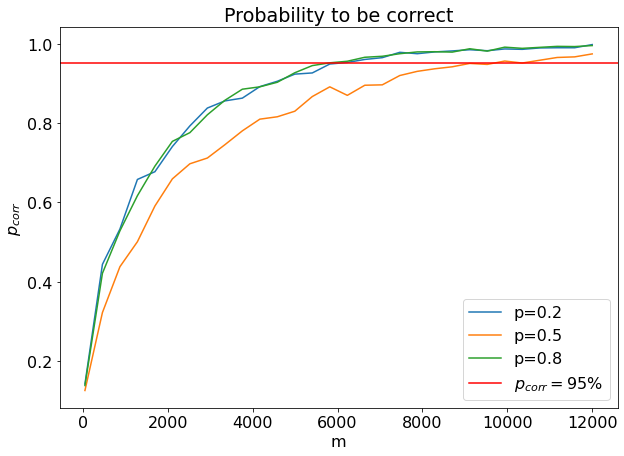

In [32]:
fig = plt.figure(figsize=(10,7))
plt.title('Probability to be correct')
plt.xlabel('m')
plt.ylabel(r'$p_{corr}$')
for i,p in enumerate(tab_p):
  plt.plot(tab_m,p_corr[i], label=r'p={}'.format(p))
plt.axhline(y=0.95, color='r', linestyle='-', label=r'$p_{corr} = 95\%$')
plt.legend()
plt.show()

As we expected, the curves intercept the horizontal line at values of $m$ which are much smaller that the theoretical $m^*$.

### <span style="color:purple">Bonus 4</span>: 
####  Plot the behaviour of the probability of error $\mathbb{P}\big(\hat p \notin [p - 0.01, p + 0.01]\big)$ as a function of $p$ for values of $m\in[10,10^4]$, and compare it with the theoretical $m^*$.

In [33]:
tab_m = [100,400,1600,6400]
tab_p = np.linspace(0,1,25)

In [34]:
p_err = 1 - np.array([ np.array([ prob_corr(m, p) for p in tab_p ]) for m in tab_m])

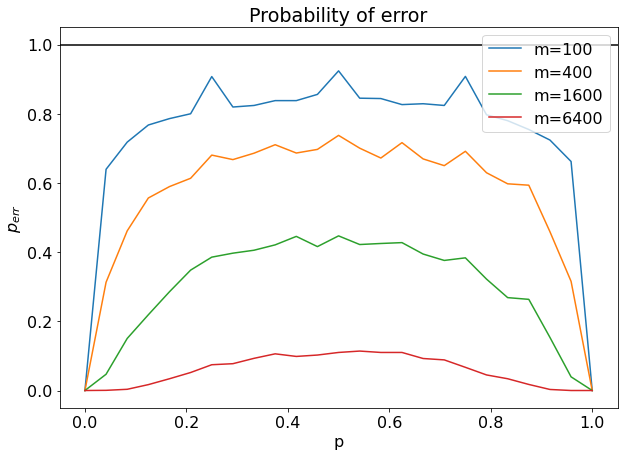

In [35]:
fig = plt.figure(figsize=(10,7))
plt.title('Probability of error')
plt.xlabel('p')
plt.ylabel(r'$p_{err}$')
for i,m in enumerate(tab_m):
  plt.plot(tab_p,p_err[i], label=r'm={}'.format(m))
plt.axhline(y=1, color='k', linestyle='-')
plt.legend()
plt.show()